In [3]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#model
import lightgbm as lgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
#al
from modAL.models import ActiveLearner,Committee
from modAL.uncertainty import uncertainty_sampling,margin_sampling,entropy_sampling
from functools import partial
from modAL.disagreement import vote_entropy_sampling

#metric
from sklearn.datasets import make_blobs
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score

import warnings

warnings.filterwarnings('ignore')

# unsupervised

In [2]:
def show(data,x1,x2,t,y1,y2):
    fig, ax = plt.subplots(figsize=(8.5, 10),dpi=600)
    # plt.plot(df['Random_Knn'], df['Random_Lighgbm'],df["Random_GradientBoosting"],df["Random_Catboost"])
    x = np.linspace(x1, x2, x2-x1)
    
    # 1
    ax1=plt.subplot(211)
    l1=plt.plot(x, data['Auto_Kappa'],color='#539165',label='Autoencoder')
    l2=plt.plot(x, data['IF_Kappa'], color='#FDD36A',label='IForest')
    l3=plt.plot(x, data['OCSVM_Kappa'], color='#A84448',linestyle='-.',label='OneClassSVM')
    l4=plt.plot(x, data['Random_Kappa'],color='#3F497F',linestyle='--',label='Random')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of AL over Time')#Kappa F1
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    
    
    #2
    ax2=plt.subplot(212)
    l1=plt.plot(x, data['Auto_F1'],color='#539165',label='Autoencoder')
    l2=plt.plot(x, data['IF_F1'], color='#FDD36A',label='IForest')
    l3=plt.plot(x, data['OCSVM_F1'], color='#A84448',linestyle='-.',label='OneClassSVM')
    l4=plt.plot(x, data['Random_F1'],color='#3F497F',linestyle='--',label='Random')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('F1 of AL over Time')#Kappa F1
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('F1')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    plt.savefig('./un_random_1000.jpg')
    plt.show()

In [ ]:
#high
data1=pd.read_csv("./result/random_high_un_1000.csv",index_col=0)
data1

In [ ]:
show(data1,100,1101,50,0.8,1)

In [ ]:
#low random initial
data2=pd.read_csv("./result/random_low_un_1000.csv",index_col=0)
data2

In [ ]:
show(data2,1000,2001,50,0.2,0.8)

In [9]:
#low top initial
data3=pd.read_csv("./random_low_un_1000_top.csv",index_col=0)
data3

,Auto_Kappa,Auto_F1,IF_Kappa,IF_F1,OCSVM_Kappa,OCSVM_F1,Random_Kappa,Random_F1
0,0.116254,0.120953,0.150153,0.151659,0.726604,0.727273,0.328900,0.329545
1,0.116254,0.120953,0.150153,0.151659,0.720878,0.721569,0.328900,0.329545
2,0.116254,0.120953,0.150153,0.151659,0.701525,0.702290,0.328900,0.329545
3,0.116254,0.120953,0.150153,0.151659,0.757785,0.758333,0.328900,0.329545
4,0.116254,0.120953,0.150153,0.151659,0.742044,0.742616,0.328900,0.329545
...,...,...,...,...,...,...,...,...
996,0.162837,0.167102,0.207913,0.211640,0.505096,0.506224,0.689306,0.689956
997,0.162837,0.167102,0.196608,0.200477,0.509357,0.510460,0.689306,0.689956
998,0.162837,0.167102,0.217331,0.220913,0.511514,0.512605,0.683310,0.683983
999,0.162837,0.167102,0.210217,0.213889,0.502993,0.504132,0.689306,0.689956


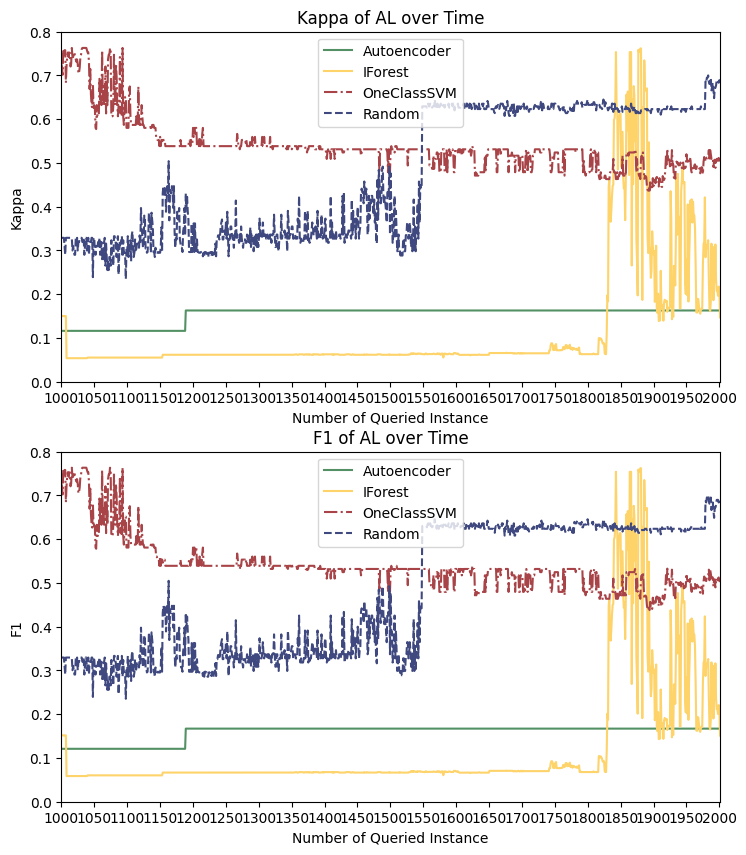

In [12]:
show(data3,1000,2001,50,0,0.8)

In [13]:
#low top initial
data4=pd.read_csv("./random_low_un_300_top.csv",index_col=0)
data4

,Auto_Kappa,Auto_F1,IF_Kappa,IF_F1,OCSVM_Kappa,OCSVM_F1
0,0.001986,0.007793,-0.001550,0.000000,0.116254,0.120953
1,0.002026,0.007833,-0.001572,0.000000,0.116254,0.120953
2,0.002004,0.007811,-0.001550,0.000000,0.116254,0.120953
3,0.001969,0.007776,-0.001550,0.000000,0.116254,0.120953
4,0.002004,0.007811,-0.001550,0.000000,0.116254,0.120953
...,...,...,...,...,...,...
1646,0.162837,0.167102,0.207913,0.211640,0.505096,0.506224
1647,0.162837,0.167102,0.196608,0.200477,0.509357,0.510460
1648,0.162837,0.167102,0.217331,0.220913,0.511514,0.512605
1649,0.162837,0.167102,0.210217,0.213889,0.502993,0.504132


In [22]:
def show_top(data,x1,x2,t,y1,y2):
    fig, ax = plt.subplots(figsize=(10, 10),dpi=600)
    # plt.plot(df['Random_Knn'], df['Random_Lighgbm'],df["Random_GradientBoosting"],df["Random_Catboost"])
    x = np.linspace(x1, x2, x2-x1)
    
    # 1
    ax1=plt.subplot(211)
    l1=plt.plot(x, data['Auto_Kappa'],color='#539165',label='Autoencoder')
    l2=plt.plot(x, data['IF_Kappa'], color='#FDD36A',label='IForest')
    l3=plt.plot(x, data['OCSVM_Kappa'], color='#A84448',linestyle='-.',label='OneClassSVM')
    #l4=plt.plot(x, data['Random_Kappa'],color='#3F497F',linestyle='--',label='Random')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of AL over Time')#Kappa F1
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    
    
    #2
    ax2=plt.subplot(212)
    l1=plt.plot(x, data['Auto_F1'],color='#539165',label='Autoencoder')
    l2=plt.plot(x, data['IF_F1'], color='#FDD36A',label='IForest')
    l3=plt.plot(x, data['OCSVM_F1'], color='#A84448',linestyle='-.',label='OneClassSVM')
    #l4=plt.plot(x, data['Random_F1'],color='#3F497F',linestyle='--',label='Random')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('F1 of AL over Time')#Kappa F1
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('F1')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    plt.savefig('./un_random_300.jpg')
    plt.show()

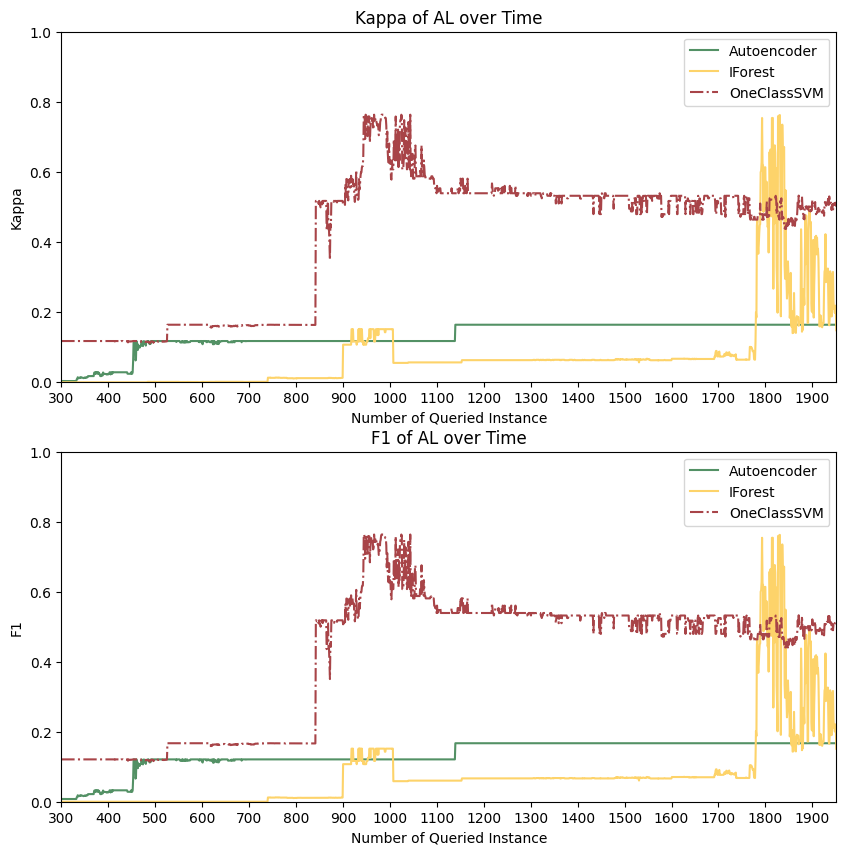

In [23]:
show_top(data4,300,1951,100,0,1)

# supervised
## convert

In [ ]:
data1=pd.read_csv("./result/random_Kappa_6903102.csv",index_col=0)#6903102 3901890
data1

In [ ]:
data2=pd.read_csv("./result/random_Kappa_6903102_committee.csv",index_col=0)#6903102 3901890

In [ ]:
data=pd.concat([data1,data2],axis=1)#6903102 3901890
data

In [ ]:
data.to_csv("./drawdata/random_Kappa_6903102_all.csv")

## draw

In [52]:
data=pd.read_csv("./drawdata/random_Kappa_3901890_all.csv",index_col=0)#6903102 3901890
data

,Random_Knn,Random_Lightgbm,Random_GradientBoosting,Random_Catboost,Uncertainty_Knn,Uncertainty_Lightgbm,Uncertainty_GradientBoosting,Uncertainty_Catboost,Entropy_Knn,Entropy_Lightgbm,...,Knn_gradient,Knn_catboost,light_gradient,light_catboost,gradient_catboost,Knn_gb_cb,Knn_lg_cb,lg_gb_cb,Knn_lg_gb,Knn_lg_gb_cb
0,0.724544,0.000000,0.000000,0.933428,0.724544,0.000000,0.000000,0.933428,0.724544,0.000000,...,0.724544,0.724544,0.0,0.932494,0.932494,0.775576,0.775576,0.636296,0.902662,0.782613
1,0.724544,0.000000,0.000000,0.921485,0.724544,0.000000,0.000000,0.949213,0.724544,0.000000,...,0.724544,0.729418,0.0,0.933537,0.933537,0.775038,0.775038,0.743082,0.892380,0.782530
2,0.724626,0.000000,0.000000,0.914716,0.724544,0.000000,0.000000,0.950669,0.724544,0.000000,...,0.723842,0.753729,0.0,0.935574,0.935574,0.775188,0.775188,0.831857,0.893689,0.782169
3,0.724626,0.000000,0.000000,0.912223,0.719937,0.000000,0.000000,0.948968,0.719937,0.000000,...,0.727967,0.759364,0.0,0.936343,0.936343,0.779266,0.779266,0.861807,0.916267,0.783464
4,0.724471,0.000000,0.000000,0.914184,0.719937,0.000000,0.000000,0.959413,0.719937,0.000000,...,0.732840,0.757945,0.0,0.934897,0.934897,0.779458,0.779458,0.883270,0.913148,0.780409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.804457,0.720854,0.688519,0.978402,0.809490,0.768342,0.769013,0.993729,0.809490,0.768342,...,0.846949,0.927976,0.0,0.989558,0.988339,0.943370,0.980699,0.971340,0.990609,0.783483
197,0.804473,0.721156,0.688519,0.972155,0.809490,0.768342,0.774142,0.993774,0.809490,0.768342,...,0.843738,0.928176,0.0,0.989603,0.988928,0.943273,0.980515,0.970573,0.990833,0.793794
198,0.805715,0.728463,0.694712,0.973006,0.809916,0.768426,0.775787,0.993774,0.809916,0.768426,...,0.843738,0.926713,0.0,0.989558,0.988520,0.943058,0.982520,0.970573,0.990609,0.783483
199,0.805715,0.730424,0.694712,0.974991,0.809916,0.768132,0.776665,0.993729,0.809916,0.768132,...,0.843524,0.928220,0.0,0.989558,0.988565,0.943611,0.983789,0.970528,0.990609,0.796558


In [53]:
%matplotlib inline
def show_high(data,x1,x2,y1,y2):
    x = np.linspace(x1, x2, x2-x1)
    figure=plt.figure(figsize=(15,9),dpi=600)
    # 1
    ax1=plt.subplot(221)
    l1=ax1.plot(x, data['Random_Knn'],color='#539165',label='Random')
    l2=ax1.plot(x, data['Uncertainty_Knn'], color='#FDD36A',label='Confidence')
    l3=ax1.plot(x, data['Entropy_Knn'], color='#A84448',linestyle='-.',label='Entropy')
    l4=ax1.plot(x, data['Margin_Knn'],color='#3F497F',linestyle='--',label='Margin')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of KNN over Time')#Kappa F1
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, 10)
    plt.xticks(my_x_ticks)
    
    
    #2
    ax2=plt.subplot(222)
    l5=ax2.plot(x, data['Random_Lightgbm'],color='#539165',label='Random')
    l6=ax2.plot(x, data['Uncertainty_Lightgbm'], color='#FDD36A',label='Confidence')
    l7=ax2.plot(x, data['Entropy_Lightgbm'], color='#A84448',linestyle='-.',label='Entropy')
    l8=ax2.plot(x, data['Margin_Lightgbm'],color='#3F497F',linestyle='--',label='Margin')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of Lightgbm over Time')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, 10)
    plt.xticks(my_x_ticks)

 
    # 3
    ax3=plt.subplot(223)
    l9=plt.plot(x, data['Random_GradientBoosting'],color='#539165',label='Random')
    l10=plt.plot(x, data['Uncertainty_GradientBoosting'], color='#FDD36A',label='Confidence')
    l11=plt.plot(x, data['Entropy_GradientBoosting'], color='#A84448',linestyle='-.',label='Entropy')
    l12=plt.plot(x, data['Margin_GradientBoosting'],color='#3F497F',linestyle='--',label='Margin')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of GradientBoosting over Time')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, 10)
    plt.xticks(my_x_ticks)
    
    # 4
    ax3=plt.subplot(224)
    l13=plt.plot(x, data['Random_Catboost'],color='#539165',label='Random')
    l14=plt.plot(x, data['Uncertainty_Catboost'], color='#FDD36A',label='Confidence')
    l15=plt.plot(x, data['Entropy_Catboost'], color='#A84448',linestyle='-.',label='Entropy')
    l16=plt.plot(x, data['Margin_Catboost'],color='#3F497F',linestyle='--',label='Margin')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of Catboost over Time')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, 10)
    plt.xticks(my_x_ticks)
    
    
    plt.savefig('./Kappa_high_random.jpg')

    plt.show()

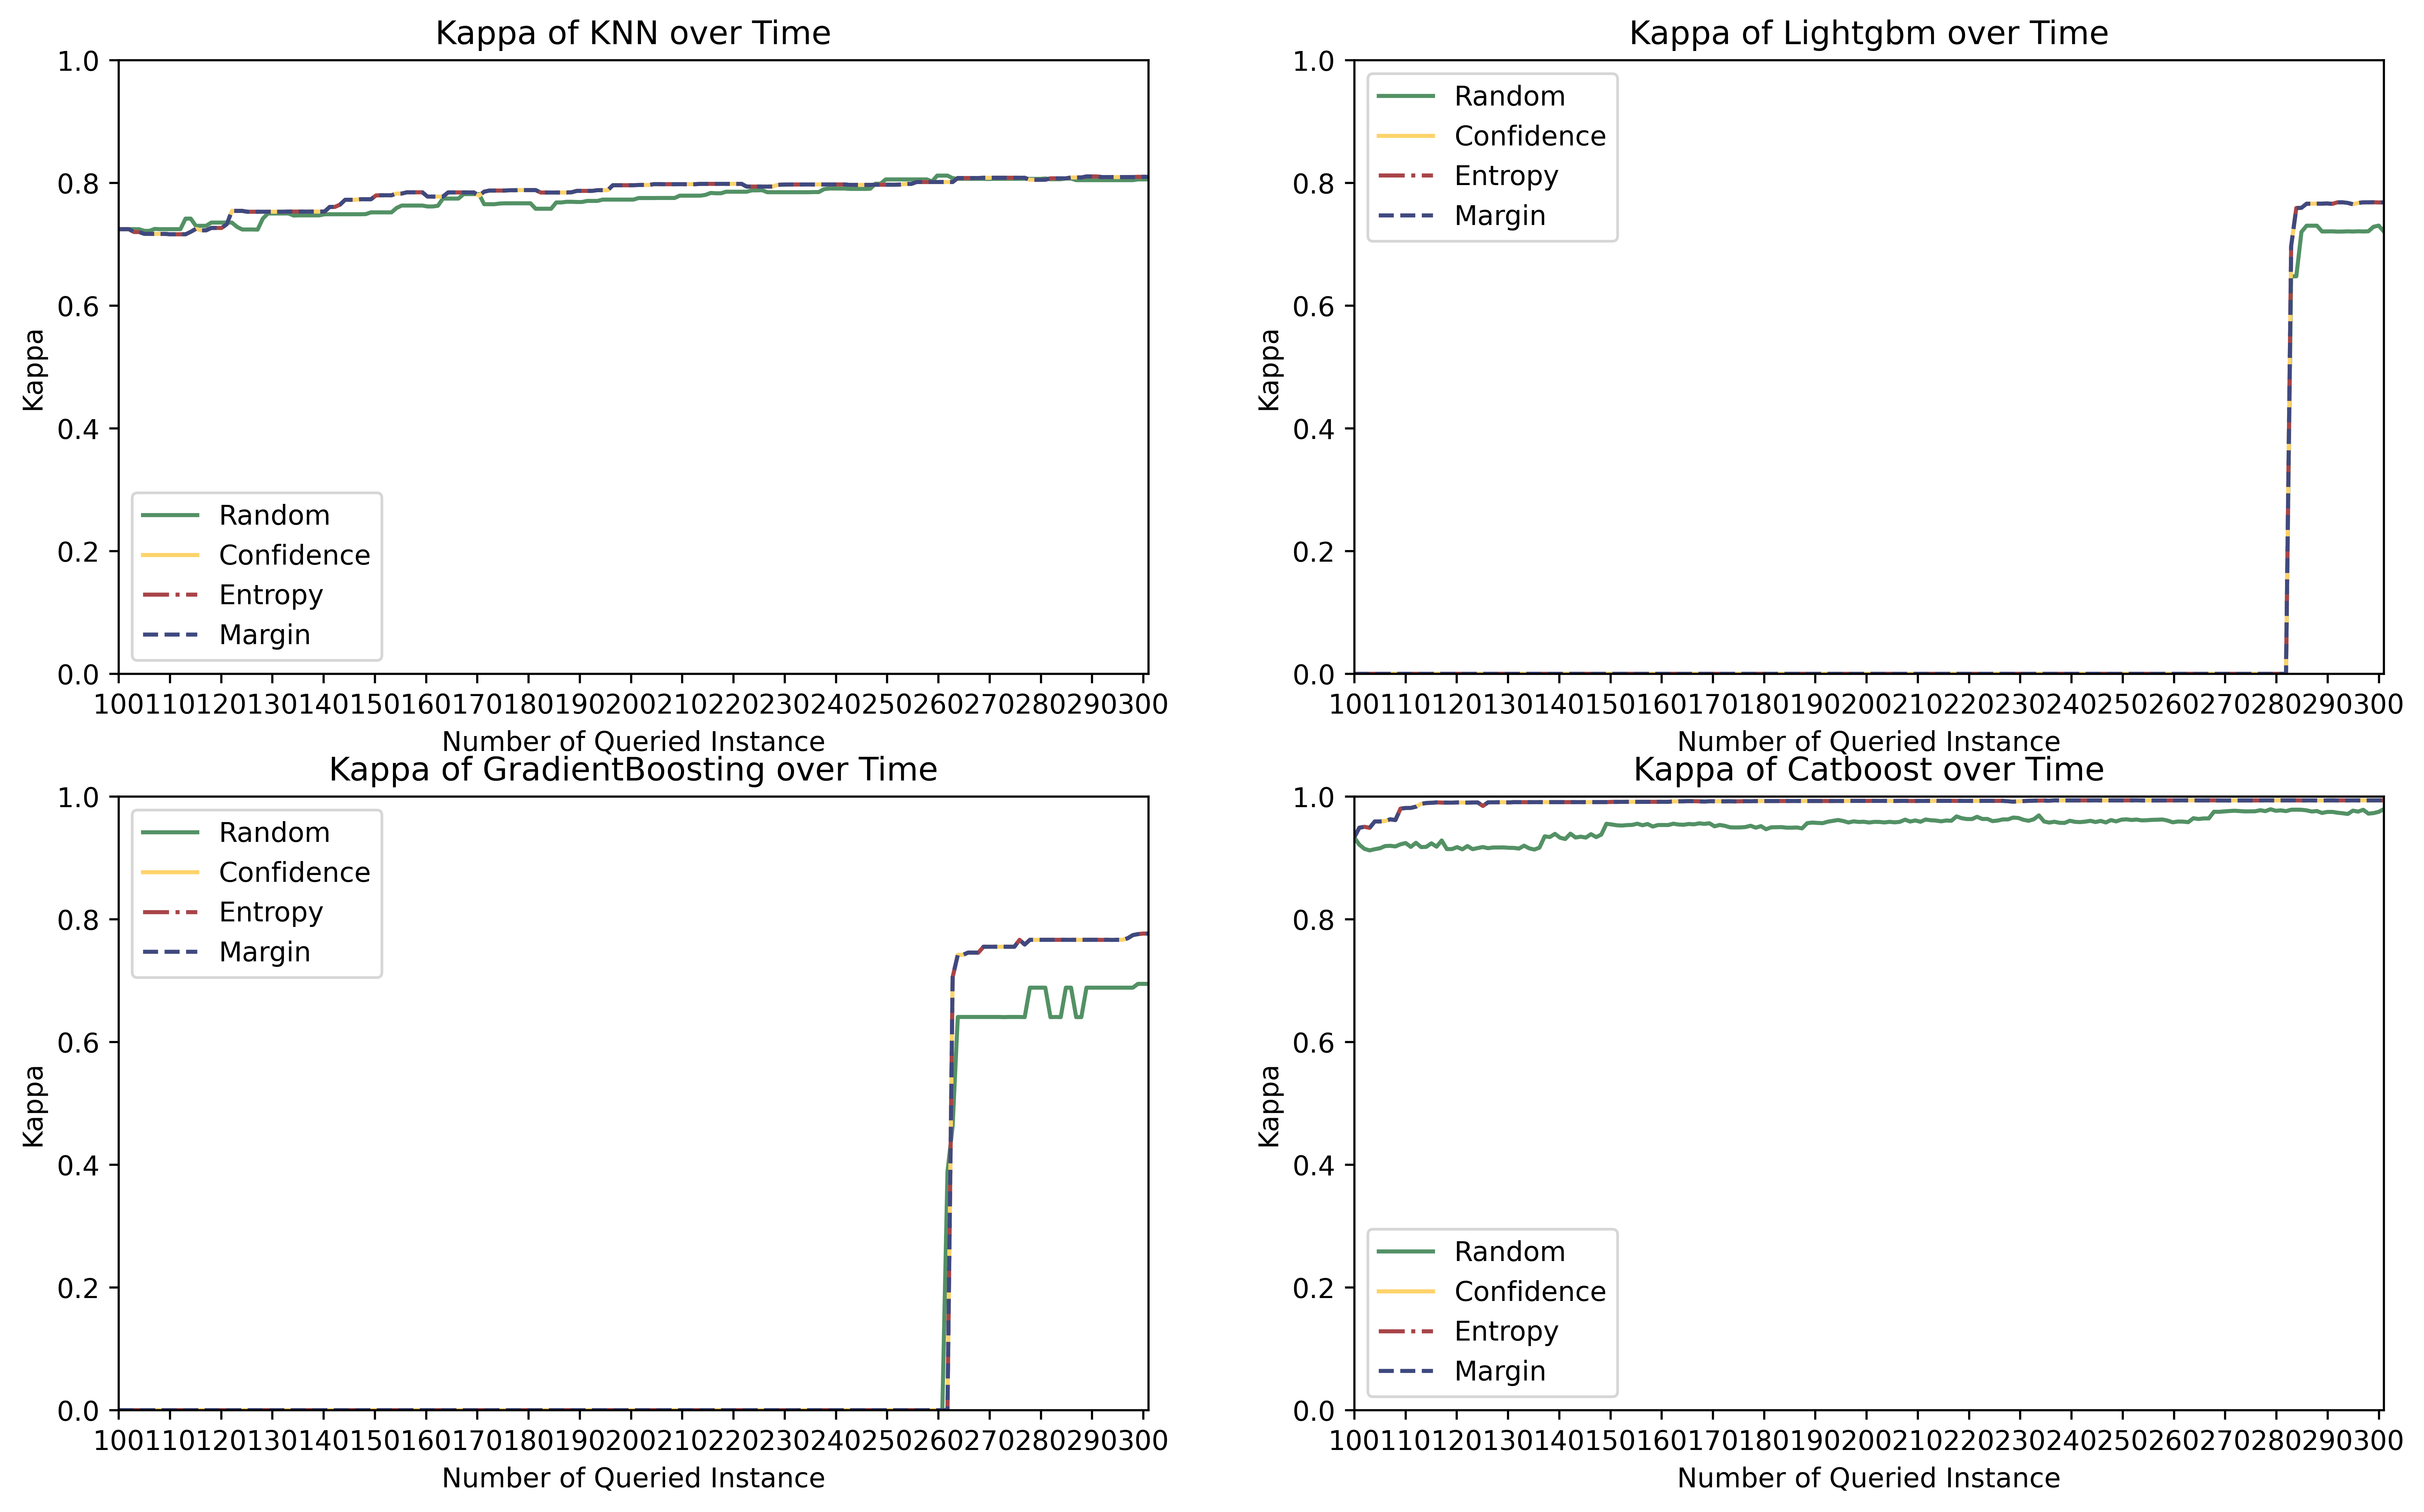

In [54]:
show_high(data,100,301,0,1)

In [55]:
%matplotlib inline
def show_committe(data,x1,x2,y1,y2,t):
    x = np.linspace(x1, x2, x2-x1)
    figure=plt.figure(figsize=(17,6),dpi=600)
    # 1
    ax1=plt.subplot(131)
    l1=ax1.plot(x, data['Knn_light'],color='#539165',label='Knn_light')
    l2=ax1.plot(x, data['Knn_gradient'], color='#FDD36A',label='Knn_gradient')
    l3=ax1.plot(x, data['Knn_catboost' ], color='#A84448',linestyle='-.',label='Knn_catboost')
    l4=ax1.plot(x, data['light_gradient'],color='#3F497F',linestyle='--',label='light_gradient')
    l5=ax1.plot(x, data['light_catboost'],color='#BEF0CB',label='light_catboost')
    l6=ax1.plot(x, data['gradient_catboost'], color='#BFACE2',label='gradient_catboost')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of Committee Over Time (2 model)')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    
    
    #2
    ax1=plt.subplot(132)
    l7=plt.plot(x, data['lg_gb_cb'],color='#BFACE2',label='lg_gb_cb')
    l8=plt.plot(x, data['Knn_gb_cb'], color='#FDD36A',label='Knn_gb_cb')
    l9=plt.plot(x, data['Knn_lg_cb'],color='#539165',label='Knn_lg_cb')
    l10=plt.plot(x, data['Knn_lg_gb'], color='#BEF0CB',label='Knn_lg_gb')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of Committee over Time(3 model)')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    
       #2
    ax1=plt.subplot(133)
    l11=plt.plot(x, data['Knn_lg_gb_cb'], color='#A84448',linestyle='-.',label='Knn_lg_gb_cb')
    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of Committee over Time (4 model)')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    
    plt.savefig('./Kappa_high_random_committe.jpg')

    plt.show()

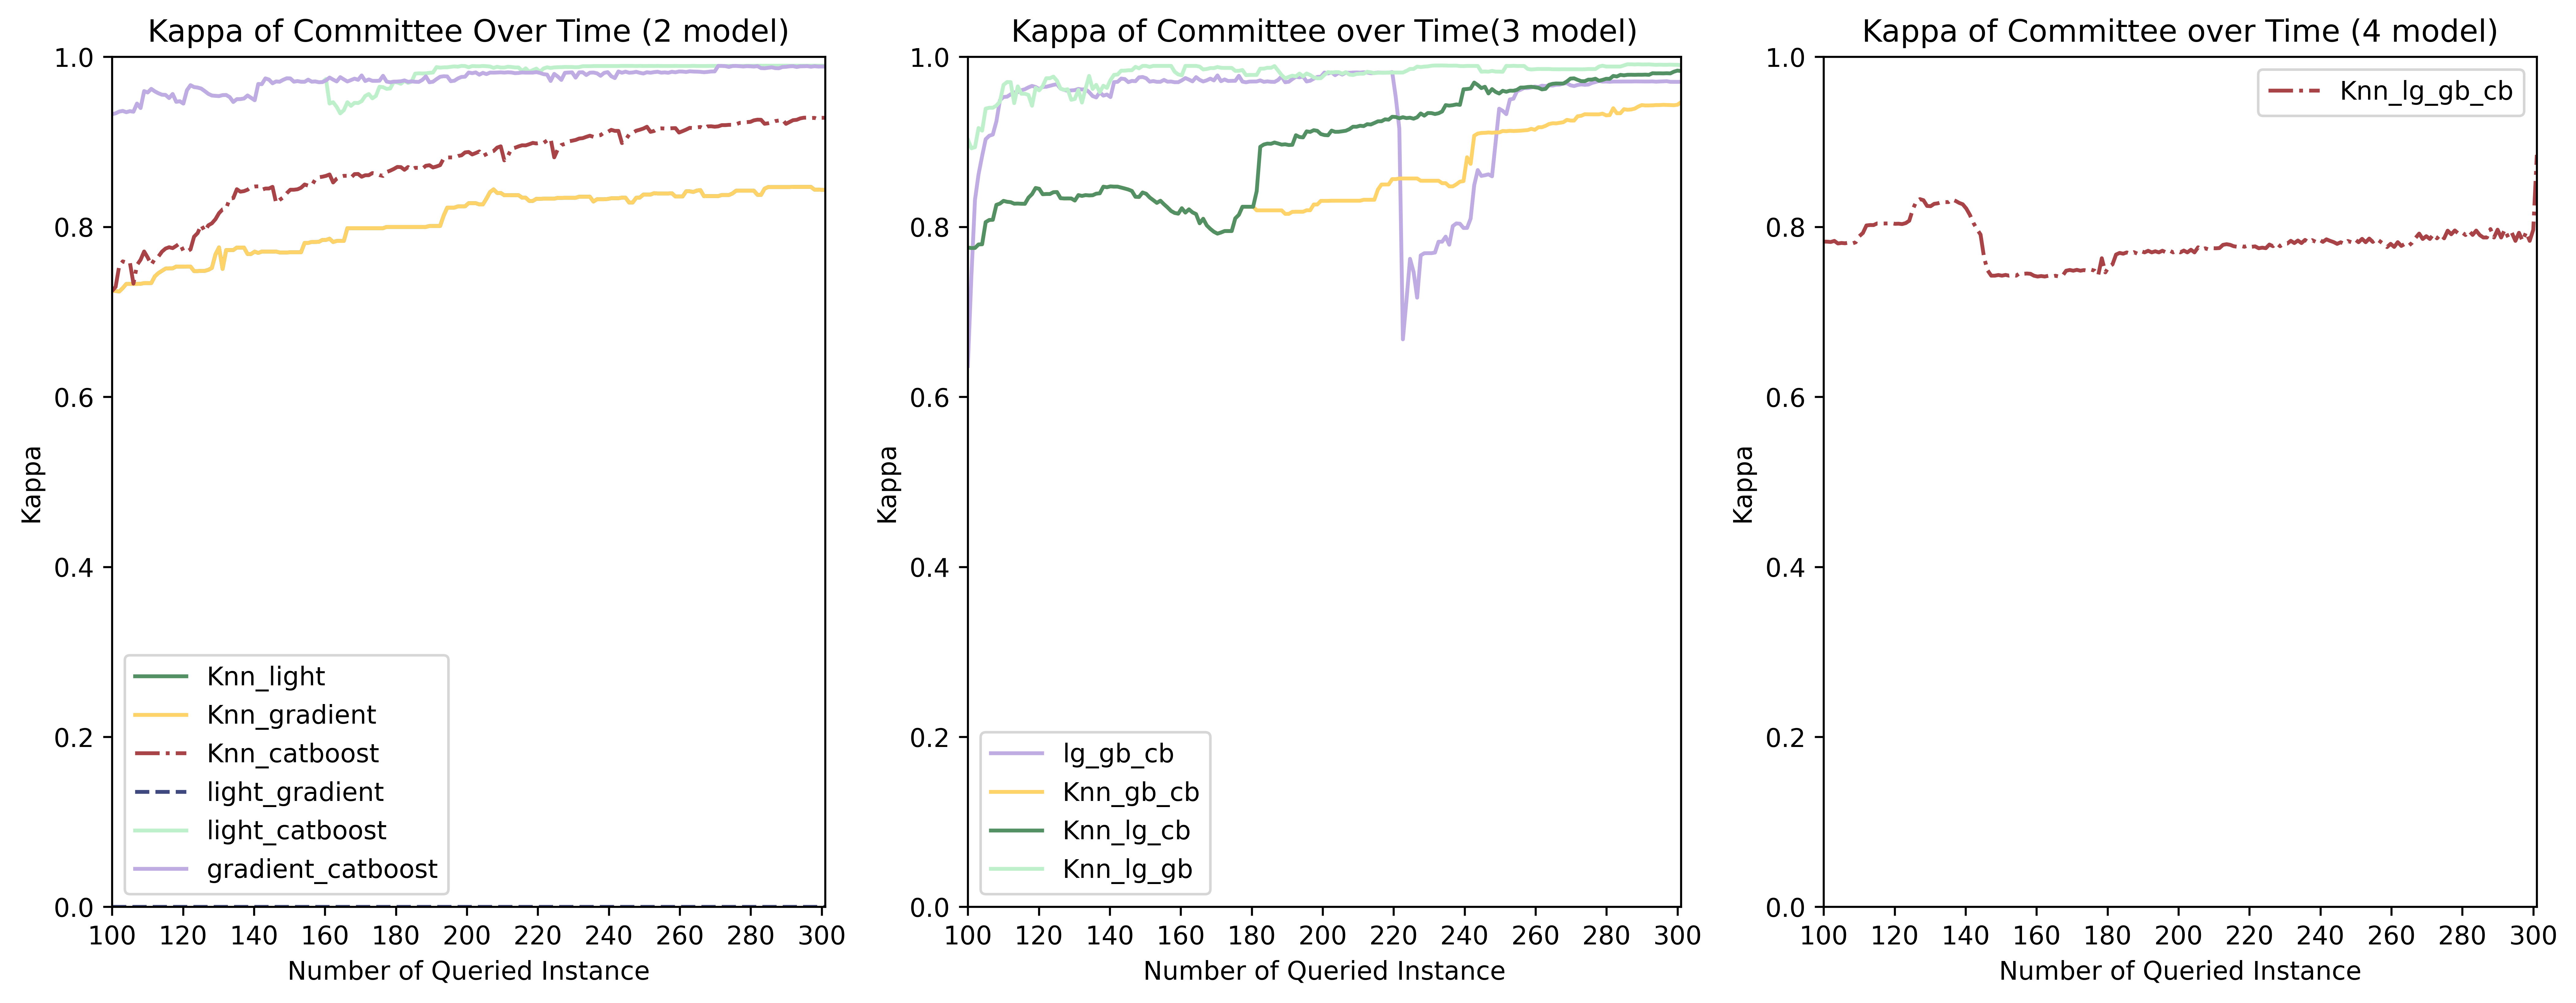

In [56]:
show_committe(data,100,301,0,1,20)

In [57]:
%matplotlib inline
def show_compare(data,x1,x2,y1,y2,t):
    x = np.linspace(x1, x2, x2-x1)
    figure=plt.figure(figsize=(10,6),dpi=600)
    l1=plt.plot(x, data['Knn_lg_gb_cb'], color='#A84448',linestyle='-.',label='Knn_lg_gb_cb')
    l2=plt.plot(x, data['Uncertainty_Knn'],color='#BFACE2',label='Uncertainty_Knn')
    l3=plt.plot(x, data['Uncertainty_Lightgbm'], color='#FDD36A',label='Uncertainty_Lightgbm')
    l4=plt.plot(x, data['Uncertainty_GradientBoosting'],color='#539165',label='Uncertainty_GradientBoosting')
    l5=plt.plot(x, data['Uncertainty_Catboost'], color='#BEF0CB',label='Uncertainty_Catboost')
    

    plt.legend(loc = "best")
    plt.xlim((x1, x2))
    plt.ylim((y1, y2))
    plt.title('Kappa of best Committee strategy and Uncertatinty strategy over Time')
    plt.xlabel('Number of Queried Instance')
    plt.ylabel('Kappa')
    my_x_ticks = np.arange(x1, x2, t)
    plt.xticks(my_x_ticks)
    
    plt.savefig('./Kappa_high_random_compare.jpg')

    plt.show()

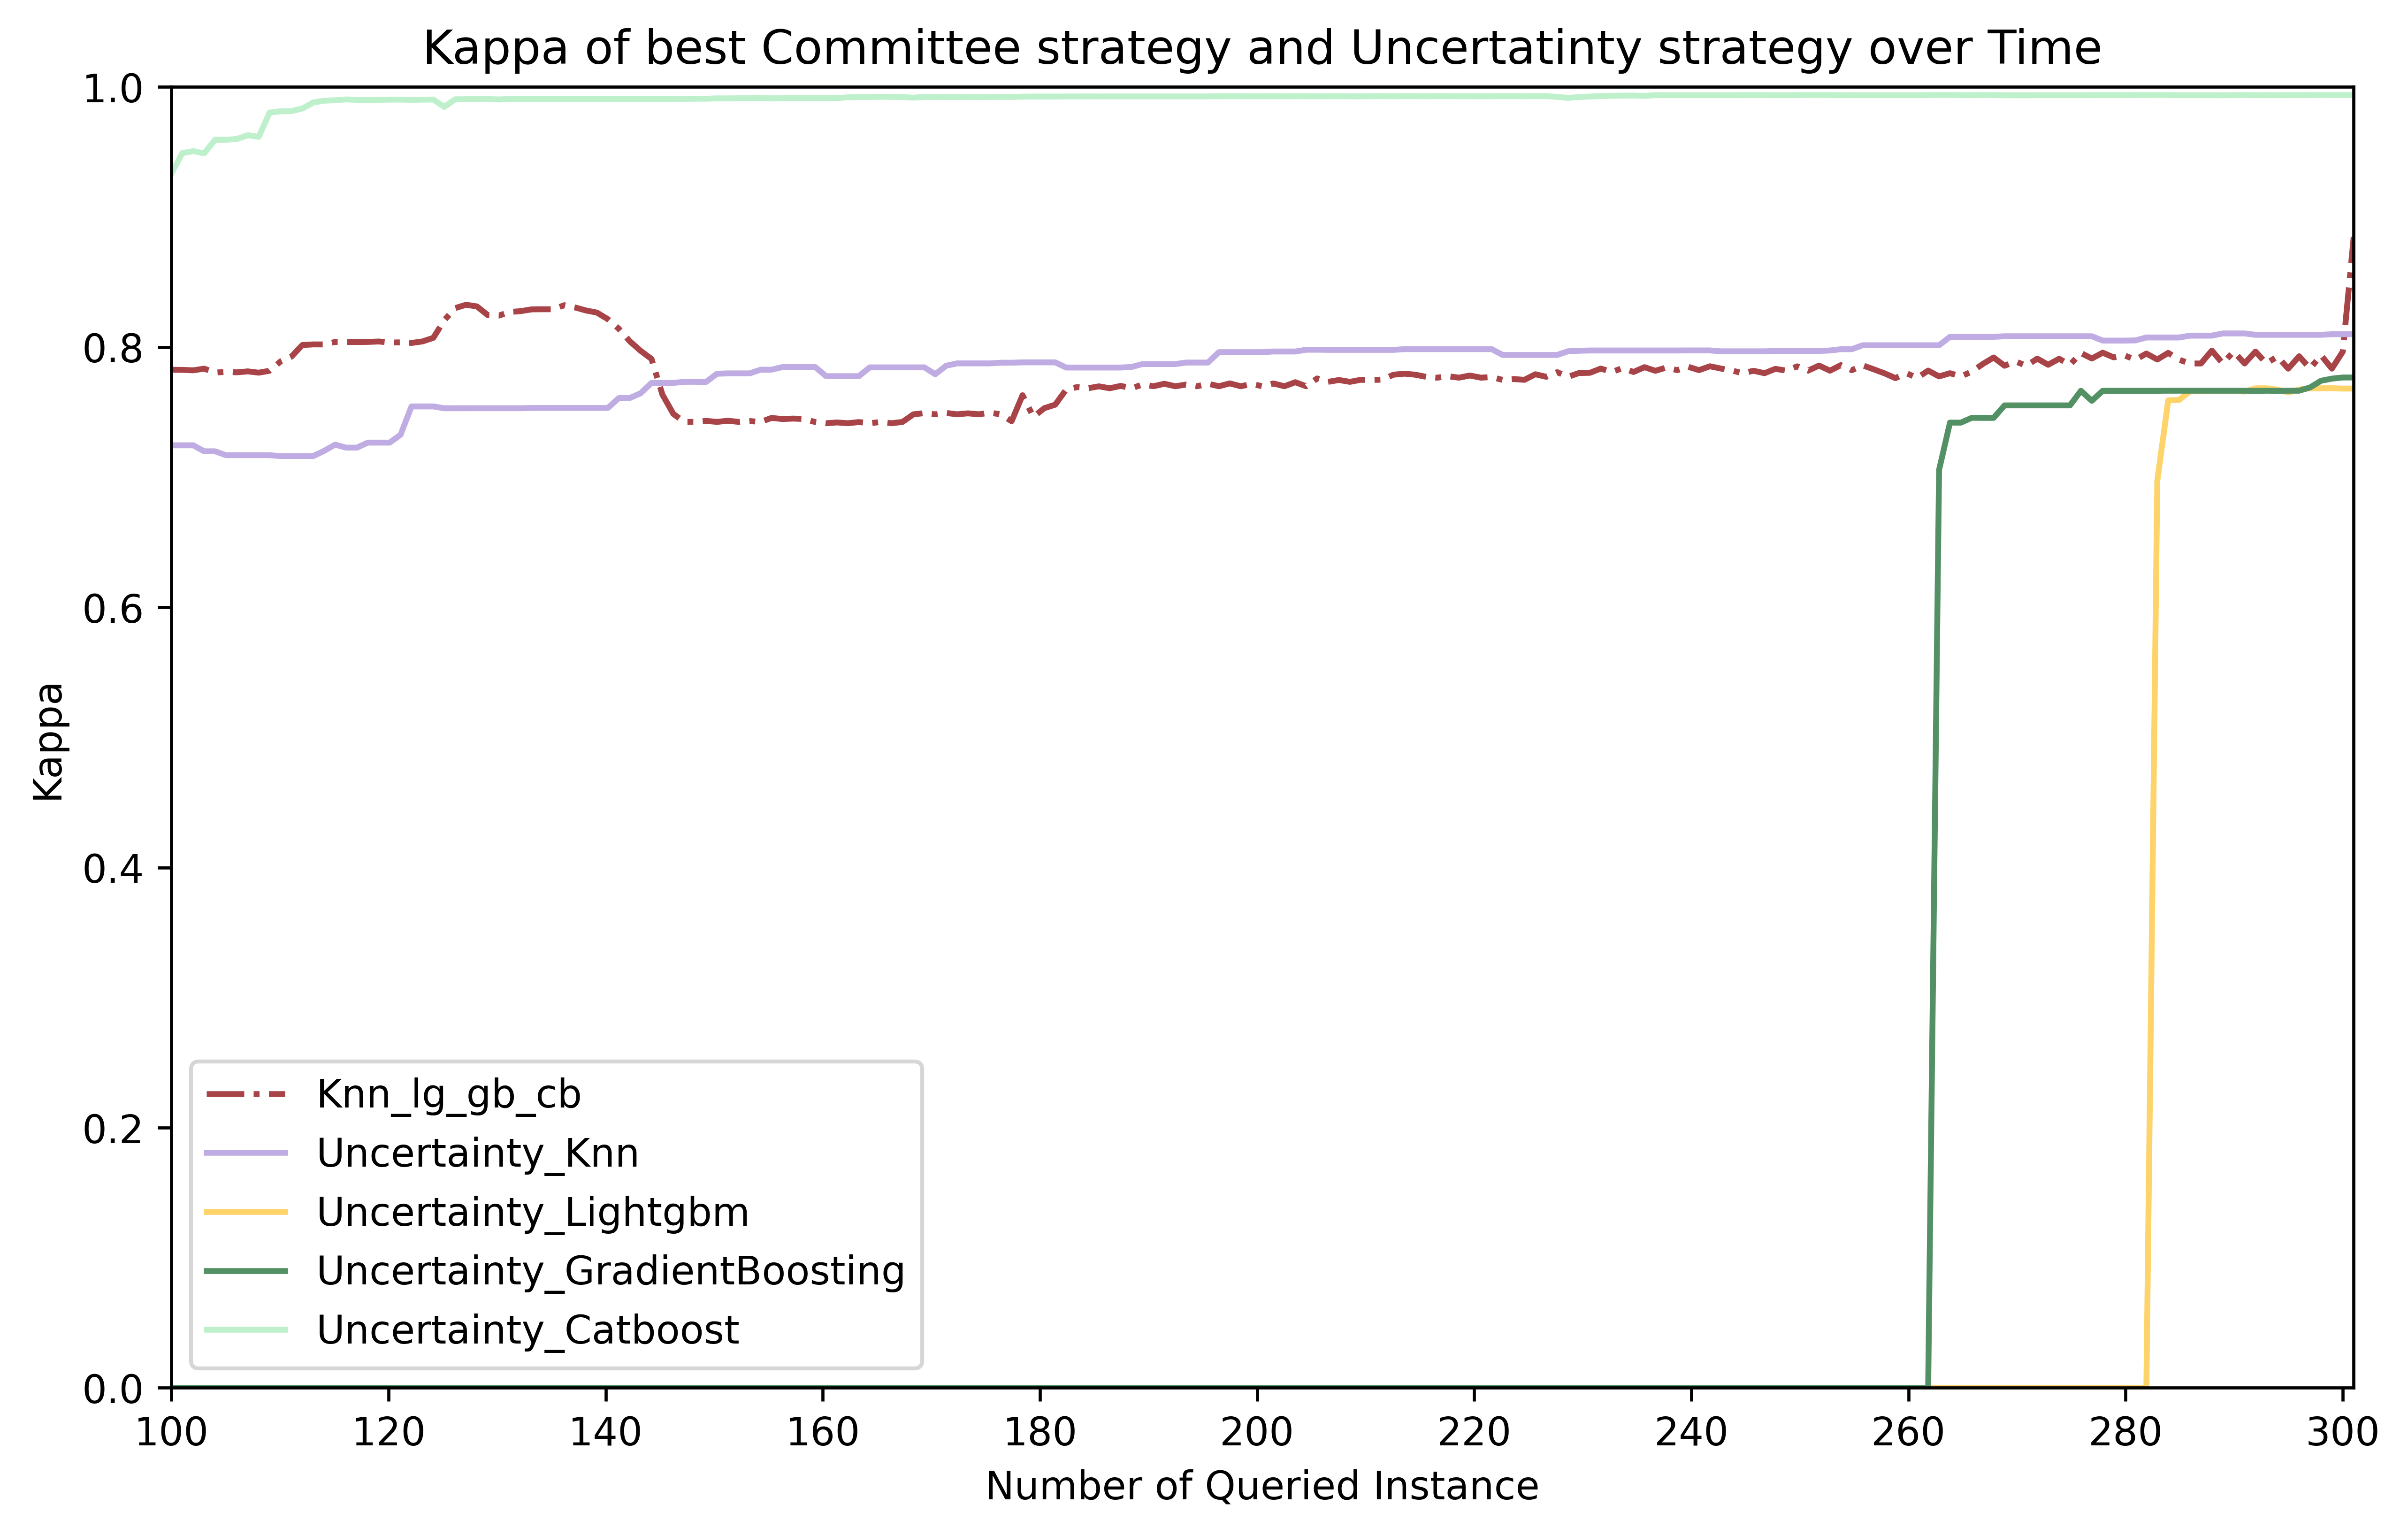

In [58]:
show_compare(data,100,301,0,1,20)